# Machine Learning Coursework

**Analysis for forecasting the export value of crop products**

**1. Import necessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

from functools import reduce
from sklearn.preprocessing import MinMaxScaler

Load dataset to a dataframe

In [2]:
import pandas as pd

# Load each dataset into a separate DataFrame
crops_production_df = pd.read_csv("Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")
food_trade_df = pd.read_csv("Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")
consumer_prices_df = pd.read_csv("Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv")
employment_df = pd.read_csv("Employment - FAOSTAT_data_en_2-27-2024.csv")
exchange_rate_df = pd.read_csv("Exchange rate - FAOSTAT_data_en_2-22-2024.csv")
fertilizers_use_df = pd.read_csv("Fertilizers use - FAOSTAT_data_en_2-27-2024.csv")
food_security_df = pd.read_csv("Food security indicators  - FAOSTAT_data_en_2-22-2024.csv")


**2.Pre-processing each dataframe separately**

**2.i.Crops Production(QCL)**

In [3]:
crops_production_df.shape

(41649, 15)

In [4]:
crops_production_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [5]:
crops_production_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                41649
dtype: int64

In [6]:
crops_production_df.eq(0).sum()

Domain Code          0
Domain               0
Area Code (M49)      0
Area                 0
Element Code         0
Element              0
Item Code (CPC)      0
Item                 0
Year Code            0
Year                 0
Unit                 0
Value               10
Flag                 0
Flag Description     0
Note                 0
dtype: int64

In [7]:
crops_production_df =crops_production_df.pivot_table(values='Value', index = ['Area', 'Year'], columns='Item', fill_value=None).reset_index()

In [8]:
crops_production_df.isnull().sum()

Item
Area                                0
Year                                0
Cereals, primary                  426
Citrus Fruit, Total              1410
Fibre Crops, Fibre Equivalent    1888
Fruit Primary                      69
Oilcrops, Cake Equivalent         419
Oilcrops, Oil Equivalent          358
Pulses, Total                     637
Roots and Tubers, Total            92
Sugar Crops Primary              1450
Treenuts, Total                  1962
Vegetables Primary                 97
dtype: int64

In [9]:
crops_production_df.shape

(4587, 13)

In [10]:
crops_production_df.eq(0).sum()

Item
Area                             0
Year                             0
Cereals, primary                 0
Citrus Fruit, Total              0
Fibre Crops, Fibre Equivalent    5
Fruit Primary                    0
Oilcrops, Cake Equivalent        0
Oilcrops, Oil Equivalent         0
Pulses, Total                    0
Roots and Tubers, Total          0
Sugar Crops Primary              0
Treenuts, Total                  5
Vegetables Primary               0
dtype: int64

In [11]:
# Add a new column 'Total Value' that sums up all item values for each row
crops_production_df['Total Value of crop yield'] = crops_production_df.drop(['Area', 'Year'], axis=1).sum(axis=1)

In [12]:
# Create a pivot table to separate crop items as columns and use the sum of total values
crops_production_pivot_df = crops_production_df.pivot_table(
    index=["Area", "Year"],  # Define the index columns
    values="Total Value of crop yield",  # Define the values to populate the pivot table
    aggfunc="sum",  # Use the sum function to aggregate values
    fill_value=0  # Fill missing values with 0
)

# Reset the index to make 'Area' and 'Year' normal columns again
crops_production_pivot_df.reset_index(inplace=True)

# Display the pivot table
crops_production_pivot_df.head()

Item,Area,Year,Total Value of crop yield
0,Afghanistan,2000,661957
1,Afghanistan,2001,667714
2,Afghanistan,2002,672489
3,Afghanistan,2003,673301
4,Afghanistan,2004,675944


In [13]:
crops_production_pivot_df.shape

(4587, 3)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
crops_production_pivot_df['Total Value of crop yield'] = scaler.fit_transform(crops_production_pivot_df[['Total Value of crop yield']])

# Display the normalized DataFrame
crops_production_pivot_df.head()


Item,Area,Year,Total Value of crop yield
0,Afghanistan,2000,0.256352
1,Afghanistan,2001,0.258585
2,Afghanistan,2002,0.260437
3,Afghanistan,2003,0.260752
4,Afghanistan,2004,0.261777


**2.ii.Food Trade Indicators(TCL)**

In [15]:
food_trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [16]:
food_trade_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,141738.000000,141738.000000,141738.000000,141738.000000,1.417380e+05,0.0
mean,424.988359,5765.555010,2006.724273,2006.724273,4.572981e+05,NaN
std,253.512489,149.862005,9.168199,9.168199,1.876930e+06,NaN
min,4.000000,5622.000000,1991.000000,1991.000000,0.000000e+00,NaN
25%,204.000000,5622.000000,1999.000000,1999.000000,2.150000e+03,NaN
50%,414.000000,5622.000000,2007.000000,2007.000000,2.406200e+04,NaN
75%,643.000000,5922.000000,2015.000000,2015.000000,1.764239e+05,NaN
max,894.000000,5922.000000,2022.000000,2022.000000,8.355806e+07,NaN


In [17]:
food_trade_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [18]:
# Pivot the table to separate Import and Export Values
food_trade_pivot_df = food_trade_df.pivot_table(
    index=["Area Code (M49)", "Area", "Item Code (CPC)", "Item", "Year"],
    columns="Element",
    values="Value",
    fill_value=0  # Fill missing values with 0
).reset_index()

# Rename the pivoted columns for clarity
food_trade_pivot_df.columns.name = None  # Remove the name of the columns index
food_trade_pivot_df.rename(columns={
    'Import Value': 'ImportValue',
    'Export Value': 'ExportValue'
}, inplace=True)

In [19]:
food_trade_pivot_df.head()

,Area Code (M49),Area,Item Code (CPC),Item,Year,ExportValue,ImportValue
0,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1991,0.0,28300.0
1,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1992,0.0,34800.0
2,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1993,0.0,12000.0
3,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1994,0.0,5300.0
4,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1995,0.0,61400.0


In [20]:
food_trade_pivot_df.shape

(73994, 7)

In [21]:
# Further pivot the data to turn items into columns with sub-columns for Import and Export values
food_trade_pivot_item = food_trade_pivot_df.pivot_table(
    index=["Area Code (M49)", "Area", "Year"],
    columns=["Item"],
    values=["ImportValue", "ExportValue"],
    fill_value=0  # Fill missing values with 0
).reset_index()

# Simplify multi-level columns for easier access
food_trade_pivot_item.columns = ['_'.join(col).strip() for col in food_trade_pivot_item.columns.values]
food_trade_pivot_item.rename(columns={'Area Code (M49)_': 'Area Code (M49)', 'Area_': 'Area', 'Year_': 'Year'}, inplace=True)

# Display the transformed data
food_trade_pivot_item.head()


,Area Code (M49),Area,Year,ExportValue_Alcoholic Beverages,ExportValue_Cereals and Preparations,ExportValue_Dairy Products and Eggs,ExportValue_Fats and Oils (excluding Butter),ExportValue_Fruit and Vegetables,ExportValue_Meat and Meat Preparations,ExportValue_Non-alcoholic Beverages,...,ImportValue_Dairy Products and Eggs,ImportValue_Fats and Oils (excluding Butter),ImportValue_Fruit and Vegetables,ImportValue_Meat and Meat Preparations,ImportValue_Non-alcoholic Beverages,ImportValue_Non-edible Fats and Oils,ImportValue_Non-food,ImportValue_Other food,ImportValue_Sugar and Honey,ImportValue_Tobacco
0,4,Afghanistan,1991,0.0,0.0,0.0,0.0,51858.0,0.0,0.0,...,4590.0,28300.0,360.0,203.0,0.0,0.0,12000.0,26360.0,4900.0,12000.0
1,4,Afghanistan,1992,0.0,0.0,0.0,0.0,19062.0,0.0,0.0,...,3550.0,34800.0,1705.0,1410.0,0.0,0.0,15200.0,18300.0,17800.0,15200.0
2,4,Afghanistan,1993,0.0,0.0,0.0,0.0,21324.0,0.0,0.0,...,4020.0,12000.0,2336.0,100.0,0.0,0.0,17800.0,28040.0,14100.0,17800.0
3,4,Afghanistan,1994,0.0,0.0,0.0,0.0,26907.0,0.0,0.0,...,3700.0,5300.0,897.0,120.0,0.0,0.0,21000.0,21680.0,16800.0,21000.0
4,4,Afghanistan,1995,0.0,0.0,0.0,0.0,24240.0,0.0,0.0,...,1500.0,61400.0,906.0,170.0,0.0,0.0,24600.0,45315.0,19200.0,24600.0


In [22]:
food_trade_pivot_item.columns

Index(['Area Code (M49)', 'Area', 'Year', 'ExportValue_Alcoholic Beverages',
       'ExportValue_Cereals and Preparations',
       'ExportValue_Dairy Products and Eggs',
       'ExportValue_Fats and Oils (excluding Butter)',
       'ExportValue_Fruit and Vegetables',
       'ExportValue_Meat and Meat Preparations',
       'ExportValue_Non-alcoholic Beverages',
       'ExportValue_Non-edible Fats and Oils', 'ExportValue_Non-food',
       'ExportValue_Other food', 'ExportValue_Sugar and Honey',
       'ExportValue_Tobacco', 'ImportValue_Alcoholic Beverages',
       'ImportValue_Cereals and Preparations',
       'ImportValue_Dairy Products and Eggs',
       'ImportValue_Fats and Oils (excluding Butter)',
       'ImportValue_Fruit and Vegetables',
       'ImportValue_Meat and Meat Preparations',
       'ImportValue_Non-alcoholic Beverages',
       'ImportValue_Non-edible Fats and Oils', 'ImportValue_Non-food',
       'ImportValue_Other food', 'ImportValue_Sugar and Honey',
       'ImportVa

In [23]:
crop_export = [
    'ExportValue_Alcoholic Beverages',
    'ExportValue_Cereals and Preparations',
    'ExportValue_Fats and Oils (excluding Butter)',
    'ExportValue_Fruit and Vegetables',
    'ExportValue_Non-alcoholic Beverages',
    'ExportValue_Non-edible Fats and Oils',
    'ExportValue_Non-food',
    'ExportValue_Other food',
    'ExportValue_Sugar and Honey',
    'ExportValue_Tobacco'
]

crop_import = [
    'ImportValue_Alcoholic Beverages',
    'ImportValue_Cereals and Preparations',
    'ImportValue_Fats and Oils (excluding Butter)',
    'ImportValue_Fruit and Vegetables',
    'ImportValue_Non-alcoholic Beverages',
    'ImportValue_Non-edible Fats and Oils',
    'ImportValue_Non-food',
    'ImportValue_Other food',
    'ImportValue_Sugar and Honey',
    'ImportValue_Tobacco'
]

livestock_export = [
    'ExportValue_Meat and Meat Preparations',
    'ExportValue_Dairy Products and Eggs'
]

livestock_import = ['ImportValue_Meat and Meat Preparations',
                            'ImportValue_Dairy Products and Eggs'
]


In [24]:
# Compute total export and import values for crops
food_trade_pivot_item['TotalExportValue_Crops'] = food_trade_pivot_item[crop_export].sum(axis=1)
food_trade_pivot_item['TotalImportValue_Crops'] = food_trade_pivot_item[crop_import].sum(axis=1)

# Compute total export and import values for livestock
food_trade_pivot_item['TotalExportValue_Livestock'] = food_trade_pivot_item[livestock_export].sum(axis=1)
food_trade_pivot_item['TotalImportValue_Livestock'] = food_trade_pivot_item[livestock_import].sum(axis=1)

# Display the updated DataFrame
food_trade_pivot_item.head()


,Area Code (M49),Area,Year,ExportValue_Alcoholic Beverages,ExportValue_Cereals and Preparations,ExportValue_Dairy Products and Eggs,ExportValue_Fats and Oils (excluding Butter),ExportValue_Fruit and Vegetables,ExportValue_Meat and Meat Preparations,ExportValue_Non-alcoholic Beverages,...,ImportValue_Non-alcoholic Beverages,ImportValue_Non-edible Fats and Oils,ImportValue_Non-food,ImportValue_Other food,ImportValue_Sugar and Honey,ImportValue_Tobacco,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock
0,4,Afghanistan,1991,0.0,0.0,0.0,0.0,51858.0,0.0,0.0,...,0.0,0.0,12000.0,26360.0,4900.0,12000.0,98243.0,125520.0,0.0,4793.0
1,4,Afghanistan,1992,0.0,0.0,0.0,0.0,19062.0,0.0,0.0,...,0.0,0.0,15200.0,18300.0,17800.0,15200.0,42112.0,128605.0,0.0,4960.0
2,4,Afghanistan,1993,0.0,0.0,0.0,0.0,21324.0,0.0,0.0,...,0.0,0.0,17800.0,28040.0,14100.0,17800.0,44564.0,132076.0,0.0,4120.0
3,4,Afghanistan,1994,0.0,0.0,0.0,0.0,26907.0,0.0,0.0,...,0.0,0.0,21000.0,21680.0,16800.0,21000.0,50357.0,112377.0,0.0,3820.0
4,4,Afghanistan,1995,0.0,0.0,0.0,0.0,24240.0,0.0,0.0,...,0.0,0.0,24600.0,45315.0,19200.0,24600.0,49596.0,213741.0,0.0,1670.0


In [25]:
# final dataset with the label 'TotalExportValue_Crops
food_trade_pivot = food_trade_pivot_item[['Area', 'Year', 'TotalExportValue_Crops', 'TotalImportValue_Crops', 'TotalExportValue_Livestock', 'TotalImportValue_Livestock']]
food_trade_pivot.head()


,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock
0,Afghanistan,1991,98243.0,125520.0,0.0,4793.0
1,Afghanistan,1992,42112.0,128605.0,0.0,4960.0
2,Afghanistan,1993,44564.0,132076.0,0.0,4120.0
3,Afghanistan,1994,50357.0,112377.0,0.0,3820.0
4,Afghanistan,1995,49596.0,213741.0,0.0,1670.0


In [26]:
food_trade_pivot.shape

(6205, 6)

**2.iii.Consumer Price Indicators(CP)**

In [27]:
consumer_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112890 entries, 0 to 112889
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       112890 non-null  object 
 1   Domain            112890 non-null  object 
 2   Area Code (M49)   112890 non-null  int64  
 3   Area              112890 non-null  object 
 4   Year Code         112890 non-null  int64  
 5   Year              112890 non-null  int64  
 6   Item Code         112890 non-null  int64  
 7   Item              112890 non-null  object 
 8   Months Code       112890 non-null  int64  
 9   Months            112890 non-null  object 
 10  Element Code      112890 non-null  int64  
 11  Element           112890 non-null  object 
 12  Unit              55227 non-null   object 
 13  Value             112890 non-null  float64
 14  Flag              112890 non-null  object 
 15  Flag Description  112890 non-null  object 
 16  Note              57

In [28]:
consumer_prices_df.describe()

,Area Code (M49),Year Code,Year,Item Code,Months Code,Element Code,Value
count,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,1.128900e+05
mean,424.738719,2011.649588,2011.649588,23013.489211,7006.451448,6123.043157,2.059421e+08
std,249.672423,6.716990,6.716990,0.499886,3.437632,1.999543,1.683090e+10
min,4.000000,2000.000000,2000.000000,23013.000000,7001.000000,6121.000000,-2.498299e+01
25%,212.000000,2006.000000,2006.000000,23013.000000,7003.000000,6121.000000,4.245692e+00
50%,426.000000,2012.000000,2012.000000,23013.000000,7006.000000,6125.000000,3.087651e+01
75%,638.000000,2017.000000,2017.000000,23014.000000,7009.000000,6125.000000,9.252795e+01
max,894.000000,2023.000000,2023.000000,23014.000000,7012.000000,6125.000000,2.235770e+12


In [29]:
consumer_prices_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Year Code               0
Year                    0
Item Code               0
Item                    0
Months Code             0
Months                  0
Element Code            0
Element                 0
Unit                57663
Value                   0
Flag                    0
Flag Description        0
Note                55227
dtype: int64

In [30]:
consumer_prices_df.eq(0).sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Year Code             0
Year                  0
Item Code             0
Item                  0
Months Code           0
Months                0
Element Code          0
Element               0
Unit                  0
Value               110
Flag                  0
Flag Description      0
Note                  0
dtype: int64

In [31]:
# Grouping data by area and year, then listing all months present for each group
months_per_year_area = consumer_prices_df.groupby(['Area', 'Year'])['Months'].unique()

# Check for completeness of months in each group
months_full_set = set(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
missing_months = months_per_year_area.apply(lambda x: months_full_set - set(x))

# Filter out those that have all months
missing_months = missing_months[missing_months != set()]

print(missing_months.head(), missing_months.size)


Area         Year
Afghanistan  2023    {November, October, December}
Albania      2023    {November, October, December}
Algeria      2023    {November, October, December}
Andorra      2023    {November, October, December}
Angola       2023    {November, October, December}
Name: Months, dtype: object 203


In [32]:
# Check if the missing months are only associated with the year 2023
missing_months_2023_only = all(missing_months.index.get_level_values('Year') == 2023)
missing_months_2023_only


True

In [33]:
# Pivot the table
consumer_prices_pivot_df = consumer_prices_df.pivot_table(
    index=['Area', 'Year'],  # Define the index columns
    columns='Item',          # Define the columns to pivot
    values='Value',          # Define the values to populate the pivot table
    fill_value=None          # Specify fill_value as None to keep NaN values
)

# Reset the index to make 'Area' and 'Year' normal columns again
consumer_prices_pivot_df.reset_index(inplace=True)

# Display the pivoted DataFrame
consumer_prices_pivot_df.head()


Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation
0,Afghanistan,2000,26.629848,NaN
1,Afghanistan,2001,29.893548,12.780692
2,Afghanistan,2002,35.344892,18.254516
3,Afghanistan,2003,40.203113,14.102244
4,Afghanistan,2004,45.840561,14.072172


In [34]:
consumer_prices_pivot_df.isnull().sum()

Item
Area                                            0
Year                                            0
Consumer Prices, Food Indices (2015 = 100)      0
Food price inflation                          203
dtype: int64

In [35]:
consumer_prices_pivot_df.eq(0).sum()

Item
Area                                          0
Year                                          0
Consumer Prices, Food Indices (2015 = 100)    0
Food price inflation                          0
dtype: int64

**2.iv.Employment**

In [36]:
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5917 non-null   object 
 1   Domain            5917 non-null   object 
 2   Area Code (M49)   5917 non-null   int64  
 3   Area              5917 non-null   object 
 4   Indicator Code    5917 non-null   int64  
 5   Indicator         5917 non-null   object 
 6   Sex Code          5917 non-null   int64  
 7   Sex               5917 non-null   object 
 8   Year Code         5917 non-null   int64  
 9   Year              5917 non-null   int64  
 10  Element Code      5917 non-null   int64  
 11  Element           5917 non-null   object 
 12  Source Code       5917 non-null   int64  
 13  Source            5917 non-null   object 
 14  Unit              5917 non-null   object 
 15  Value             5917 non-null   float64
 16  Flag              5917 non-null   object 


In [37]:
employment_df.describe()

,Area Code (M49),Indicator Code,Sex Code,Year Code,Year,Element Code,Source Code,Value
count,5917.000000,5917.000000,5917.0,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,427.420145,21145.763394,1.0,2010.890992,2010.890992,6191.358628,3037.136049,4536.367847
std,250.847292,2.733508,0.0,6.270884,6.270884,11.845202,9.126779,27086.237113
min,4.000000,21144.000000,1.0,2000.000000,2000.000000,6173.000000,3018.000000,0.170000
25%,208.000000,21144.000000,1.0,2006.000000,2006.000000,6173.000000,3023.000000,39.100000
50%,418.000000,21144.000000,1.0,2011.000000,2011.000000,6199.000000,3043.000000,126.540000
75%,642.000000,21150.000000,1.0,2016.000000,2016.000000,6199.000000,3043.000000,1386.380000
max,894.000000,21150.000000,1.0,2022.000000,2022.000000,6199.000000,3043.000000,358919.780000


In [38]:
# Create two new columns initialized with NaN (Not a Number)
#employment_df['Mean Weekly Hours'] = pd.NA
employment_df['Employment in Agriculture'] = pd.NA

# Populate the new columns based on the 'Indicator' column
#employment_df.loc[employment_df['Indicator'].str.contains("Mean weekly hours"), 'Mean Weekly Hours'] = employment_df['Value']
employment_df.loc[employment_df['Indicator'].str.contains("Employment in agriculture, forestry and fishing"), 'Employment in Agriculture'] = employment_df['Value']

# Display the first few rows to verify changes
employment_df[['Area', 'Year', 'Indicator', 'Employment in Agriculture']].head()


,Area,Year,Indicator,Employment in Agriculture
0,Afghanistan,2014,Mean weekly hours actually worked per employed...,<NA>
1,Afghanistan,2017,Mean weekly hours actually worked per employed...,<NA>
2,Afghanistan,2000,"Employment in agriculture, forestry and fishin...",2765.95
3,Afghanistan,2001,"Employment in agriculture, forestry and fishin...",2805.54
4,Afghanistan,2002,"Employment in agriculture, forestry and fishin...",2897.51


In [39]:
# drop the null values in the 'Employment in Agriculture' column
employment_df = employment_df.dropna(subset=['Employment in Agriculture'])
employment_df.shape

(4178, 20)

In [40]:
# Filter the DataFrame to include only the relevant columns
employment_filtered = employment_df[['Area', 'Year', 'Employment in Agriculture']]

# Pivot the filtered DataFrame
employment_pivot_df = employment_filtered.pivot_table(
    index=['Area', 'Year'],  # Define the index columns
    columns=None,            # Do not specify any columns to pivot, as we want to keep the new columns
    values=['Employment in Agriculture'],  # Define the values to populate the pivot table
    fill_value=None          # Specify fill_value as None to keep NaN values
)

# Reset the index to make 'Area' and 'Year' normal columns again
employment_pivot_df.reset_index(inplace=True)

# Display the pivoted DataFrame
employment_pivot_df.head()


,Area,Year,Employment in Agriculture
0,Afghanistan,2000,2765.95
1,Afghanistan,2001,2805.54
2,Afghanistan,2002,2897.51
3,Afghanistan,2003,3093.27
4,Afghanistan,2004,3212.46


In [41]:
employment_pivot_df['Employment in Agriculture'] = scaler.fit_transform(employment_pivot_df[['Employment in Agriculture']])

In [42]:
employment_pivot_df

,Area,Year,Employment in Agriculture
0,Afghanistan,2000,0.007706
1,Afghanistan,2001,0.007816
2,Afghanistan,2002,0.008072
3,Afghanistan,2003,0.008618
4,Afghanistan,2004,0.008950
...,...,...,...
4173,Zimbabwe,2017,0.009484
4174,Zimbabwe,2018,0.009491
4175,Zimbabwe,2019,0.009521
4176,Zimbabwe,2020,0.009594


**2.v.Exchange Rate**

In [43]:
exchange_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103276 entries, 0 to 103275
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Domain Code              103276 non-null  object 
 1   Domain                   103276 non-null  object 
 2   Area Code (M49)          103276 non-null  int64  
 3   Area                     103276 non-null  object 
 4   ISO Currency Code (FAO)  103276 non-null  object 
 5   Currency                 103276 non-null  object 
 6   Element Code             103276 non-null  object 
 7   Element                  103276 non-null  object 
 8   Year Code                103276 non-null  int64  
 9   Year                     103276 non-null  int64  
 10  Months Code              103276 non-null  int64  
 11  Months                   103276 non-null  object 
 12  Unit                     0 non-null       float64
 13  Value                    103276 non-null  float64
 14  Flag

In [44]:
exchange_rate_df.describe()

,Area Code (M49),Year Code,Year,Months Code,Unit,Value
count,103276.000000,103276.000000,103276.000000,103276.000000,0.0,1.032760e+05
mean,428.219887,2002.605959,2002.605959,7006.493329,NaN,7.841324e+05
std,249.825569,12.427199,12.427199,3.450808,NaN,2.176740e+08
min,4.000000,1980.000000,1980.000000,7001.000000,NaN,8.160000e-06
25%,218.000000,1992.000000,1992.000000,7003.000000,NaN,1.508627e+00
50%,426.000000,2003.000000,2003.000000,7006.000000,NaN,7.501877e+00
75%,642.000000,2013.000000,2013.000000,7009.000000,NaN,1.122701e+02
max,894.000000,2023.000000,2023.000000,7012.000000,NaN,6.907838e+10


In [45]:
# check if there are null values in the Value column
exchange_rate_df['Value'].isnull().sum()

0

In [46]:
exchange_rate_pivot_df = exchange_rate_df.groupby(['Area', 'Year'])['Value'].mean().reset_index()
exchange_rate_pivot_df.shape

(8639, 3)

In [47]:
# rename Value column to 'Exchange_Value_Exchange_Rate'
exchange_rate_pivot_df.rename(columns={'Value': 'Exchange Rate Value'}, inplace=True)

In [48]:
# normalize the data
exchange_rate_pivot_df['Exchange Rate Value'] = scaler.fit_transform(exchange_rate_pivot_df[['Exchange Rate Value']])

In [49]:
exchange_rate_pivot_df

,Area,Year,Exchange Rate Value
0,Afghanistan,1980,6.563763e-09
1,Afghanistan,1981,7.359642e-09
2,Afghanistan,1982,7.526189e-09
3,Afghanistan,1983,7.526189e-09
4,Afghanistan,1984,7.526189e-09
...,...,...,...
8634,Åland Islands,2019,1.327734e-10
8635,Åland Islands,2020,1.304214e-10
8636,Åland Islands,2021,1.256470e-10
8637,Åland Islands,2022,1.413451e-10


**2.vi.Ferilizer Use**

In [50]:
fertilizers_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [51]:
fertilizers_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,17807.000000,17807.0,17807.000000,17807.000000,17807.000000,1.780700e+04
mean,428.095861,5157.0,4013.974224,2011.259224,2011.259224,2.124516e+05
std,252.862476,0.0,9.034514,5.443312,5.443312,1.408350e+06
min,4.000000,5157.0,4001.000000,2002.000000,2002.000000,0.000000e+00
25%,208.000000,5157.0,4004.000000,2007.000000,2007.000000,1.000000e+02
50%,414.000000,5157.0,4016.000000,2011.000000,2011.000000,3.584000e+03
75%,620.000000,5157.0,4022.000000,2016.000000,2016.000000,4.573800e+04
max,894.000000,5157.0,4030.000000,2021.000000,2021.000000,9.621329e+07


In [52]:
# Pivot the table
fertilizers_use_pivot_df = fertilizers_use_df.pivot_table(
    index=['Area', 'Year'],  # Define the index columns
    columns='Item',          # Define the columns to pivot
    values='Value',          # Define the values to populate the pivot table
    fill_value=None          # Specify fill_value as None to keep NaN values
)

# Reset the index to make 'Area' and 'Year' normal columns again
fertilizers_use_pivot_df.reset_index(inplace=True)

# Display the pivoted DataFrame
fertilizers_use_pivot_df.head()


Item,Area,Year,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
0,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42300.0,NaN
3,Afghanistan,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20577.0,NaN
4,Afghanistan,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68253.0,NaN


In [53]:
# check the NaN values in the dataframe
fertilizers_use_pivot_df.isnull().sum()

Item
Area                                                                           0
Year                                                                           0
Ammonia, anhydrous                                                          1640
Ammonium nitrate (AN)                                                        808
Ammonium sulphate                                                            617
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate    1053
Diammonium phosphate (DAP)                                                   727
Fertilizers n.e.c.                                                          1666
Monoammonium phosphate (MAP)                                                1029
NPK fertilizers                                                              452
Other NK compounds                                                          1727
Other NP compounds                                                           916
Other nitrogenous ferti

In [54]:
# check how many values are 0 in the dataframe
fertilizers_use_pivot_df.eq(0).sum()

Item
Area                                                                          0
Year                                                                          0
Ammonia, anhydrous                                                          182
Ammonium nitrate (AN)                                                        82
Ammonium sulphate                                                            42
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate     59
Diammonium phosphate (DAP)                                                   85
Fertilizers n.e.c.                                                           67
Monoammonium phosphate (MAP)                                                 79
NPK fertilizers                                                              15
Other NK compounds                                                          109
Other NP compounds                                                           57
Other nitrogenous fertilizers, n.e.

In [55]:
fertilizers_use_pivot_df = fertilizers_use_pivot_df.fillna(0)
fertilizers_use_pivot_df.head()

Item,Area,Year,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
0,Afghanistan,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42300.0,0.0
3,Afghanistan,2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20577.0,0.0
4,Afghanistan,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68253.0,0.0


In [56]:
fertilizers_use_pivot_df['Total Fertilizer Use'] = fertilizers_use_pivot_df.iloc[:, 2:].sum(axis=1)
fertilizers_use_pivot_df = fertilizers_use_pivot_df[['Area', 'Year', 'Total Fertilizer Use']]
# rename Total Fertilizer Use to total_fertilizer_use_fertilizers
fertilizers_use_pivot_df.rename(columns={'Total Fertilizer Use': 'total_fertilizer_use_fertilizers'}, inplace=True)
# normalize the data
fertilizers_use_pivot_df['total_fertilizer_use_fertilizers'] = scaler.fit_transform(fertilizers_use_pivot_df[['total_fertilizer_use_fertilizers']])


In [57]:
fertilizers_use_pivot_df

Item,Area,Year,total_fertilizer_use_fertilizers
0,Afghanistan,2002,0.000185
1,Afghanistan,2003,0.000343
2,Afghanistan,2004,0.000931
3,Afghanistan,2005,0.000213
4,Afghanistan,2006,0.000706
...,...,...,...
1928,Zimbabwe,2009,0.001335
1929,Zimbabwe,2010,0.001699
1930,Zimbabwe,2011,0.001387
1931,Zimbabwe,2017,0.000112


**2.vii.Food Security Indicators(FS)**

In [58]:
#food security
food_security_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [59]:
food_security_df.shape

(36512, 15)

In [60]:
food_security_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Value
count,36512.000000,36512.000000,36512.000000,3.651200e+04,36512.000000
mean,424.835342,6122.999233,21030.970777,9.691701e+06,37.620671
std,252.424973,2.662834,11.014761,1.004127e+07,67.159815
min,4.000000,6121.000000,21010.000000,2.000000e+03,-654.900000
25%,204.000000,6121.000000,21030.000000,2.010000e+03,5.000000
50%,417.000000,6121.000000,21032.000000,2.020000e+03,18.700000
75%,642.000000,6125.000000,21035.000000,2.009201e+07,58.700000
max,894.000000,6128.000000,21049.000000,2.020202e+07,5735.000000


In [61]:
print(food_security_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36512 entries, 0 to 36511
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       36512 non-null  object 
 1   Domain            36512 non-null  object 
 2   Area Code (M49)   36512 non-null  int64  
 3   Area              36512 non-null  object 
 4   Element Code      36512 non-null  int64  
 5   Element           36512 non-null  object 
 6   Item Code         36512 non-null  int64  
 7   Item              36512 non-null  object 
 8   Year Code         36512 non-null  int64  
 9   Year              36512 non-null  object 
 10  Unit              36512 non-null  object 
 11  Value             36512 non-null  float64
 12  Flag              36512 non-null  object 
 13  Flag Description  36512 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.2+ MB
None


In [62]:
food_security_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                36511
dtype: int64

In [63]:
food_security_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [64]:
# Pivot the data to get items as columns and calculate the mean value for each area, year, import, and export
food_security_pivot_df = food_security_df.pivot_table(index=['Area', 'Year'], columns=['Item'], values='Value', aggfunc='mean')

# Reset index to make 'Area' and 'Year' normal columns again
food_security_pivot_df.reset_index(inplace=True)

# Display the pivoted DataFrame
food_security_pivot_df.head()


Item,Area,Year,Average dietary energy supply adequacy (percent) (3-year average),Average protein supply (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Percent of arable land equipped for irrigation (percent) (3-year average),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent),Value of food imports in total merchandise exports (percent) (3-year average)
0,Afghanistan,2000,NaN,NaN,NaN,NaN,58.0,NaN,-2.44,35.7,NaN,NaN
1,Afghanistan,2000-2002,88.0,51.4,34.1,NaN,NaN,4.9,NaN,NaN,NaN,240.0
2,Afghanistan,2001,NaN,NaN,NaN,16.3,47.0,NaN,NaN,35.6,NaN,NaN
3,Afghanistan,2001-2003,89.0,52.1,29.3,NaN,NaN,4.9,NaN,NaN,NaN,281.0
4,Afghanistan,2002,NaN,NaN,NaN,21.0,71.0,NaN,-2.04,35.4,NaN,NaN


In [65]:
food_security_pivot_df.shape

(8580, 12)

**3.Merging ALL pivot_df**

In [66]:
crops_production_pivot_df

Item,Area,Year,Total Value of crop yield
0,Afghanistan,2000,0.256352
1,Afghanistan,2001,0.258585
2,Afghanistan,2002,0.260437
3,Afghanistan,2003,0.260752
4,Afghanistan,2004,0.261777
...,...,...,...
4582,Zimbabwe,2018,0.426255
4583,Zimbabwe,2019,0.414748
4584,Zimbabwe,2020,0.411413
4585,Zimbabwe,2021,0.407035


In [67]:
food_trade_pivot

,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock
0,Afghanistan,1991,98243.00,125520.00,0.00,4793.00
1,Afghanistan,1992,42112.00,128605.00,0.00,4960.00
2,Afghanistan,1993,44564.00,132076.00,0.00,4120.00
3,Afghanistan,1994,50357.00,112377.00,0.00,3820.00
4,Afghanistan,1995,49596.00,213741.00,0.00,1670.00
...,...,...,...,...,...,...
6200,Zambia,2018,721110.04,351889.43,16714.62,44775.95
6201,Zambia,2019,625917.20,364686.80,26076.58,45168.72
6202,Zambia,2020,718436.36,332246.79,27642.07,40491.05
6203,Zambia,2021,962831.13,461831.84,57563.93,52896.80


In [68]:
consumer_prices_pivot_df

Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation
0,Afghanistan,2000,26.629848,NaN
1,Afghanistan,2001,29.893548,12.780692
2,Afghanistan,2002,35.344892,18.254516
3,Afghanistan,2003,40.203113,14.102244
4,Afghanistan,2004,45.840561,14.072172
...,...,...,...,...
4851,Åland Islands,2019,102.928436,1.797736
4852,Åland Islands,2020,103.585137,0.643114
4853,Åland Islands,2021,104.784347,1.164459
4854,Åland Islands,2022,114.944128,9.678792


In [69]:
employment_pivot_df

,Area,Year,Employment in Agriculture
0,Afghanistan,2000,0.007706
1,Afghanistan,2001,0.007816
2,Afghanistan,2002,0.008072
3,Afghanistan,2003,0.008618
4,Afghanistan,2004,0.008950
...,...,...,...
4173,Zimbabwe,2017,0.009484
4174,Zimbabwe,2018,0.009491
4175,Zimbabwe,2019,0.009521
4176,Zimbabwe,2020,0.009594


In [70]:
exchange_rate_pivot_df

,Area,Year,Exchange Rate Value
0,Afghanistan,1980,6.563763e-09
1,Afghanistan,1981,7.359642e-09
2,Afghanistan,1982,7.526189e-09
3,Afghanistan,1983,7.526189e-09
4,Afghanistan,1984,7.526189e-09
...,...,...,...
8634,Åland Islands,2019,1.327734e-10
8635,Åland Islands,2020,1.304214e-10
8636,Åland Islands,2021,1.256470e-10
8637,Åland Islands,2022,1.413451e-10


In [71]:
fertilizers_use_pivot_df

Item,Area,Year,total_fertilizer_use_fertilizers
0,Afghanistan,2002,0.000185
1,Afghanistan,2003,0.000343
2,Afghanistan,2004,0.000931
3,Afghanistan,2005,0.000213
4,Afghanistan,2006,0.000706
...,...,...,...
1928,Zimbabwe,2009,0.001335
1929,Zimbabwe,2010,0.001699
1930,Zimbabwe,2011,0.001387
1931,Zimbabwe,2017,0.000112


In [72]:
food_security_pivot_df

Item,Area,Year,Average dietary energy supply adequacy (percent) (3-year average),Average protein supply (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Percent of arable land equipped for irrigation (percent) (3-year average),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent),Value of food imports in total merchandise exports (percent) (3-year average)
0,Afghanistan,2000,NaN,NaN,NaN,NaN,58.0,NaN,-2.44,35.7,NaN,NaN
1,Afghanistan,2000-2002,88.0,51.4,34.1,NaN,NaN,4.9,NaN,NaN,NaN,240.0
2,Afghanistan,2001,NaN,NaN,NaN,16.3,47.0,NaN,NaN,35.6,NaN,NaN
3,Afghanistan,2001-2003,89.0,52.1,29.3,NaN,NaN,4.9,NaN,NaN,NaN,281.0
4,Afghanistan,2002,NaN,NaN,NaN,21.0,71.0,NaN,-2.04,35.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8575,Zimbabwe,2019,NaN,NaN,NaN,5.6,22.0,NaN,-0.96,28.9,11.9,NaN
8576,Zimbabwe,2019-2021,91.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,15.0
8577,Zimbabwe,2020,NaN,NaN,NaN,5.6,20.0,NaN,-1.07,NaN,11.8,NaN
8578,Zimbabwe,2020-2022,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
import pandas as pd
from functools import reduce

# Create a list of DataFrames to merge
dfs = [crops_production_pivot_df, food_trade_pivot, consumer_prices_pivot_df,
        employment_pivot_df, exchange_rate_pivot_df, fertilizers_use_pivot_df,
        food_security_pivot_df]

# Convert data types of 'Area' and 'Year' columns to strings
for df in dfs:
    df['Area'] = df['Area'].astype(str)
    df['Year'] = df['Year'].astype(str)

# Merge all DataFrames in the list
try:
    merged_df = reduce(lambda left, right: pd.merge(left, right, on=['Area', 'Year'], how='outer'), dfs)
except ValueError:
    # If merge fails due to data type mismatch, use pd.concat instead
    print("Data type mismatch in merge columns. Using pd.concat instead.")
    merged_df = pd.concat(dfs, join='outer', ignore_index=True)
    merged_df = merged_df.reset_index().merge(on=['Area', 'Year'])

# Print the merged DataFrame
merged_df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10312\1786502151.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = df['Area'].astype(str)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10312\1786502151.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(str)


,Area,Year,Total Value of crop yield,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,Employment in Agriculture,...,Average dietary energy supply adequacy (percent) (3-year average),Average protein supply (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Percent of arable land equipped for irrigation (percent) (3-year average),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent),Value of food imports in total merchandise exports (percent) (3-year average)
0,Afghanistan,2000,0.256352,43095.0,270395.0,0.0,765.0,26.629848,NaN,0.007706,...,NaN,NaN,NaN,NaN,58.0,NaN,-2.44,35.7,NaN,NaN
1,Afghanistan,2001,0.258585,35440.0,276840.0,0.0,671.0,29.893548,12.780692,0.007816,...,NaN,NaN,NaN,16.3,47.0,NaN,NaN,35.6,NaN,NaN
2,Afghanistan,2002,0.260437,35964.0,354133.0,0.0,7193.0,35.344892,18.254516,0.008072,...,NaN,NaN,NaN,21.0,71.0,NaN,-2.04,35.4,NaN,NaN
3,Afghanistan,2003,0.260752,58782.0,494698.0,0.0,18085.0,40.203113,14.102244,0.008618,...,NaN,NaN,NaN,20.8,72.0,NaN,-2.20,35.4,NaN,NaN
4,Afghanistan,2004,0.261777,64919.0,503212.0,0.0,17956.0,45.840561,14.072172,0.008950,...,NaN,NaN,NaN,17.3,50.0,NaN,-2.30,35.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,Zimbabwe,2016-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.0,57.7,35.3,NaN,NaN,0.5,NaN,NaN,NaN,20.0
13412,Zimbabwe,2017-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.0,55.6,56.9,NaN,NaN,0.5,NaN,NaN,NaN,13.0
13413,Zimbabwe,2018-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.0,54.7,60.3,NaN,NaN,0.5,NaN,NaN,NaN,14.0
13414,Zimbabwe,2019-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,15.0


In [74]:
# Display column names
print("Column Names:")
print(merged_df.columns)

# Display column count
print("\nColumn Count:", len(merged_df.columns))


Column Names:
Index(['Area', 'Year', 'Total Value of crop yield', 'TotalExportValue_Crops',
       'TotalImportValue_Crops', 'TotalExportValue_Livestock',
       'TotalImportValue_Livestock',
       'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation',
       'Employment in Agriculture', 'Exchange Rate Value',
       'total_fertilizer_use_fertilizers',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of low birthweig

In [75]:
# Drop rows or columns with a high percentage of missing values
threshold = 0.5  # Threshold for dropping rows/columns
merged_df = merged_df.dropna(axis=0, thresh=int(len(merged_df.columns) * threshold), subset=None, inplace=False)
merged_df = merged_df.dropna(axis=1, thresh=int(len(merged_df) * threshold), subset=None, inplace=False)

# Create a new DataFrame with only numeric columns
numeric_df = merged_df.select_dtypes(include=[np.number])

# Fill NaN values with a specific value (e.g., 0 for numeric columns)
numeric_df[numeric_df.columns] = numeric_df[numeric_df.columns].fillna(0)

# Fill NaN values with the mean or median of the column
numeric_df = numeric_df.fillna(numeric_df.mean())  # Fill with mean
# numeric_df = numeric_df.fillna(numeric_df.median())  # Fill with median

# Fill NaN values with a forward or backward fill
numeric_df = numeric_df.ffill()  # Forward fill
# numeric_df = numeric_df.bfill()  # Backward fill

# Fill NaN values with an interpolation method
numeric_df = numeric_df.interpolate(method='linear')  # Linear interpolation
# numeric_df = numeric_df.interpolate(method='time')  # Time interpolation (for time series data)

# Update the numeric columns in the original DataFrame
merged_df[numeric_df.columns] = numeric_df

# Drop remaining NaN values if any
merged_df = merged_df.dropna()

# Print the preprocessed DataFrame
merged_df

,Area,Year,Total Value of crop yield,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,Employment in Agriculture,Exchange Rate Value,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent)
0,Afghanistan,2000,0.256352,43095.00,270395.00,0.00,765.00,26.629848,0.000000,0.007706,7.044059e-06,0.0,58.0,-2.44,35.7,0.0
1,Afghanistan,2001,0.258585,35440.00,276840.00,0.00,671.00,29.893548,12.780692,0.007816,7.065246e-06,16.3,47.0,0.00,35.6,0.0
2,Afghanistan,2002,0.260437,35964.00,354133.00,0.00,7193.00,35.344892,18.254516,0.008072,5.922767e-07,21.0,71.0,-2.04,35.4,0.0
3,Afghanistan,2003,0.260752,58782.00,494698.00,0.00,18085.00,40.203113,14.102244,0.008618,7.252972e-09,20.8,72.0,-2.20,35.4,0.0
4,Afghanistan,2004,0.261777,64919.00,503212.00,0.00,17956.00,45.840561,14.072172,0.008950,7.116510e-09,17.3,50.0,-2.30,35.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,"China, Macao SAR",2017,0.000000,207116.90,1362046.41,196.21,237508.32,104.464124,1.537601,0.000009,1.193707e-09,1.0,31.0,1.43,0.0,0.0
5546,"China, Macao SAR",2018,0.000000,178048.48,1455534.44,183.05,274094.19,107.346591,2.759109,0.000010,1.200625e-09,1.0,30.0,1.25,0.0,0.0
5547,"China, Macao SAR",2019,0.000000,37616.14,1459328.93,17.30,302520.97,111.440635,3.808533,0.000013,1.200322e-09,1.0,27.0,1.24,0.0,0.0
5548,"China, Macao SAR",2020,0.000000,33147.53,1304105.70,0.00,257829.89,115.192002,3.395334,0.000013,1.188213e-09,0.7,23.0,1.15,0.0,0.0


In [76]:
# Display column names
print("Column Names:")
print(merged_df.columns)

# Display column count
print("\nColumn Count:", len(merged_df.columns))


Column Names:
Index(['Area', 'Year', 'Total Value of crop yield', 'TotalExportValue_Crops',
       'TotalImportValue_Crops', 'TotalExportValue_Livestock',
       'TotalImportValue_Livestock',
       'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation',
       'Employment in Agriculture', 'Exchange Rate Value',
       'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of low birthweight (percent)'],
      dtype='object')

Column Count: 16


In [77]:
# Sort the DataFrame based on 'Year' column in ascending order and 'Area' alphabetically
merged_df_sorted = merged_df.sort_values(by=['Year', 'Area'], ascending=[True, True])

# Reset the index after sorting
merged_df_sorted = merged_df_sorted.reset_index(drop=True)

# Print the sorted DataFrame
merged_df_sorted

,Area,Year,Total Value of crop yield,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,Employment in Agriculture,Exchange Rate Value,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent)
0,Afghanistan,2000,0.256352,43095.00,270395.00,0.00,765.00,2.662985e+01,0.000000,0.007706,7.044059e-06,0.0,58.0,-2.44,35.7,0.0
1,Albania,2000,0.366104,29109.00,232400.00,421.00,24429.00,5.776511e+01,0.000000,0.001552,2.137553e-08,0.0,72.0,-0.54,26.2,5.7
2,Algeria,2000,0.178100,28299.22,2129255.34,70.01,460566.00,5.077936e+01,0.000000,0.003879,1.119419e-08,0.0,32.0,-1.43,37.6,6.8
3,Angola,2000,0.278817,2400.00,364798.00,0.00,80021.00,1.691044e+00,0.000000,0.006930,1.493354e-09,0.0,43.0,-2.04,51.8,17.4
4,Antigua and Barbuda,2000,0.092044,347.00,22867.00,20.00,9120.00,6.307356e+01,0.000000,0.000000,4.015073e-10,0.0,3.0,0.71,22.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,Venezuela (Bolivarian Republic of),2021,0.480924,298079.74,2774396.69,5381.21,449913.96,1.552181e+11,1773.450101,0.003583,0.000000e+00,0.0,136.0,-1.53,0.0,0.0
4194,Viet Nam,2021,0.580359,20988500.01,29234222.26,228087.34,2146876.94,1.204963e+02,0.727153,0.043475,3.444832e-06,0.0,17.0,-0.11,0.0,0.0
4195,Yemen,2021,0.259469,307182.88,4514043.99,8452.13,699376.89,1.560703e+02,4.760638,0.005078,1.540173e-07,0.0,82.0,-2.59,0.0,0.0
4196,Zambia,2021,0.574500,962831.13,461831.84,57563.93,52896.80,2.258670e+02,27.781807,0.010272,2.977493e-09,0.0,30.0,0.06,0.0,0.0


In [78]:
print(merged_df_sorted.columns)

Index(['Area', 'Year', 'Total Value of crop yield', 'TotalExportValue_Crops',
       'TotalImportValue_Crops', 'TotalExportValue_Livestock',
       'TotalImportValue_Livestock',
       'Consumer Prices, Food Indices (2015 = 100)', 'Food price inflation',
       'Employment in Agriculture', 'Exchange Rate Value',
       'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of low birthweight (percent)'],
      dtype='object')


In [79]:
# Extract the columns to be normalized
cols_to_normalize = [
    'Total Value of crop yield',
    'TotalExportValue_Crops',
    'TotalImportValue_Crops',
    'TotalExportValue_Livestock',
    'TotalImportValue_Livestock',
    'Consumer Prices, Food Indices (2015 = 100)',
    'Food price inflation',
    'Employment in Agriculture',
    'Exchange Rate Value'
]

# Check if the columns to be normalized exist in the DataFrame
if len(cols_to_normalize) > 0:
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the data using MinMaxScaler
    merged_df_sorted[cols_to_normalize] = scaler.fit_transform(merged_df_sorted[cols_to_normalize])
else:
    print("None of the specified columns exist in the DataFrame.")

# Print the sorted and normalized DataFrame
merged_df_sorted

,Area,Year,Total Value of crop yield,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,Employment in Agriculture,Exchange Rate Value,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent)
0,Afghanistan,2000,0.256352,0.000297,0.001610,0.000000e+00,0.000016,1.715640e-10,0.000126,0.007706,7.044059e-06,0.0,58.0,-2.44,35.7,0.0
1,Albania,2000,0.366104,0.000201,0.001383,1.376917e-05,0.000522,3.721543e-10,0.000126,0.001552,2.137553e-08,0.0,72.0,-0.54,26.2,5.7
2,Algeria,2000,0.178100,0.000195,0.012719,2.289737e-06,0.009837,3.271483e-10,0.000126,0.003879,1.119419e-08,0.0,32.0,-1.43,37.6,6.8
3,Angola,2000,0.278817,0.000017,0.002174,0.000000e+00,0.001709,1.089463e-11,0.000126,0.006930,1.493354e-09,0.0,43.0,-2.04,51.8,17.4
4,Antigua and Barbuda,2000,0.092044,0.000002,0.000131,6.541172e-07,0.000195,4.063543e-10,0.000126,0.000000,4.015073e-10,0.0,3.0,0.71,22.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,Venezuela (Bolivarian Republic of),2021,0.480924,0.002055,0.016575,1.759971e-04,0.009609,1.000000e+00,0.012484,0.003583,0.000000e+00,0.0,136.0,-1.53,0.0,0.0
4194,Viet Nam,2021,0.580359,0.144680,0.174705,7.459793e-03,0.045853,7.763031e-10,0.000131,0.043475,3.444832e-06,0.0,17.0,-0.11,0.0,0.0
4195,Yemen,2021,0.259469,0.002118,0.026971,2.764342e-04,0.014937,1.005490e-09,0.000159,0.005078,1.540173e-07,0.0,82.0,-2.59,0.0,0.0
4196,Zambia,2021,0.574500,0.006637,0.002754,1.882678e-03,0.001130,1.455159e-09,0.000320,0.010272,2.977493e-09,0.0,30.0,0.06,0.0,0.0


In [80]:
merged_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 16 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Area                                                                                  4198 non-null   object 
 1   Year                                                                                  4198 non-null   object 
 2   Total Value of crop yield                                                             4198 non-null   float64
 3   TotalExportValue_Crops                                                                4198 non-null   float64
 4   TotalImportValue_Crops                                                                4198 non-null   float64
 5   TotalExportValue_Livestock                                                         

**3.i.Standard Feature Scaling**

In [81]:
# Create a copy of the DataFrame to perform feature scaling
merged_df_sorted_scaled = merged_df_sorted.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform feature scaling for the specified columns
merged_df_sorted_scaled[cols_to_normalize] = scaler.fit_transform(merged_df_sorted[cols_to_normalize])

# Check the minimum and maximum values of each column after normalization
min_values_normalized = merged_df_sorted_scaled[cols_to_normalize].min()
max_values_normalized = merged_df_sorted_scaled[cols_to_normalize].max()

print("Minimum values after normalization:")
print(min_values_normalized)
print("\nMaximum values after normalization:")
print(max_values_normalized)

# Print the sorted, normalized, and scaled DataFrame
print("DataFrame after sorting, normalizing, and scaling:")
merged_df_sorted_scaled


Minimum values after normalization:
Total Value of crop yield                     0.0
TotalExportValue_Crops                        0.0
TotalImportValue_Crops                        0.0
TotalExportValue_Livestock                    0.0
TotalImportValue_Livestock                    0.0
Consumer Prices, Food Indices (2015 = 100)    0.0
Food price inflation                          0.0
Employment in Agriculture                     0.0
Exchange Rate Value                           0.0
dtype: float64

Maximum values after normalization:
Total Value of crop yield                     1.0
TotalExportValue_Crops                        1.0
TotalImportValue_Crops                        1.0
TotalExportValue_Livestock                    1.0
TotalImportValue_Livestock                    1.0
Consumer Prices, Food Indices (2015 = 100)    1.0
Food price inflation                          1.0
Employment in Agriculture                     1.0
Exchange Rate Value                           1.0
dtype: float

,Area,Year,Total Value of crop yield,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,Employment in Agriculture,Exchange Rate Value,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent)
0,Afghanistan,2000,0.256352,0.000297,0.001610,0.000000e+00,0.000016,1.715640e-10,0.000126,0.007706,7.044059e-06,0.0,58.0,-2.44,35.7,0.0
1,Albania,2000,0.366104,0.000201,0.001383,1.376917e-05,0.000522,3.721543e-10,0.000126,0.001552,2.137553e-08,0.0,72.0,-0.54,26.2,5.7
2,Algeria,2000,0.178100,0.000195,0.012719,2.289737e-06,0.009837,3.271483e-10,0.000126,0.003879,1.119419e-08,0.0,32.0,-1.43,37.6,6.8
3,Angola,2000,0.278817,0.000017,0.002174,0.000000e+00,0.001709,1.089463e-11,0.000126,0.006930,1.493354e-09,0.0,43.0,-2.04,51.8,17.4
4,Antigua and Barbuda,2000,0.092044,0.000002,0.000131,6.541172e-07,0.000195,4.063543e-10,0.000126,0.000000,4.015073e-10,0.0,3.0,0.71,22.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,Venezuela (Bolivarian Republic of),2021,0.480924,0.002055,0.016575,1.759971e-04,0.009609,1.000000e+00,0.012484,0.003583,0.000000e+00,0.0,136.0,-1.53,0.0,0.0
4194,Viet Nam,2021,0.580359,0.144680,0.174705,7.459793e-03,0.045853,7.763031e-10,0.000131,0.043475,3.444832e-06,0.0,17.0,-0.11,0.0,0.0
4195,Yemen,2021,0.259469,0.002118,0.026971,2.764342e-04,0.014937,1.005490e-09,0.000159,0.005078,1.540173e-07,0.0,82.0,-2.59,0.0,0.0
4196,Zambia,2021,0.574500,0.006637,0.002754,1.882678e-03,0.001130,1.455159e-09,0.000320,0.010272,2.977493e-09,0.0,30.0,0.06,0.0,0.0


In [82]:
print(merged_df_sorted.Area)

0                              Afghanistan
1                                  Albania
2                                  Algeria
3                                   Angola
4                      Antigua and Barbuda
                       ...                
4193    Venezuela (Bolivarian Republic of)
4194                              Viet Nam
4195                                 Yemen
4196                                Zambia
4197                              Zimbabwe
Name: Area, Length: 4198, dtype: object


In [83]:
merged_df_sorted.shape

(4198, 16)

**4.Model Training And Testing**

In [84]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = merged_df_sorted.drop(['Area', 'Year', 'TotalExportValue_Crops'], axis=1)
y = merged_df_sorted['TotalExportValue_Crops']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('mlp_regressor', MLPRegressor(max_iter=1000, random_state=42))  # MLP Regressor
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'mlp_regressor__hidden_layer_sizes': [(25, 130), (250, 150, 100)],  # different hidden layer sizes.
    'mlp_regressor__activation': ['relu', 'tanh'],  # Activation functions
    'mlp_regressor__solver': ['adam', 'lbfgs'],  # Solvers
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.0012936971164344984
Mean Absolute Error (MAE): 0.022537259583653876


In [85]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Root Mean Absolute Error (RMAE)
rmae = np.sqrt(mae)
print("Root Mean Absolute Error (RMAE):", rmae)



Root Mean Squared Error (RMSE): 0.035968001284954636
Root Mean Absolute Error (RMAE): 0.15012414723705803


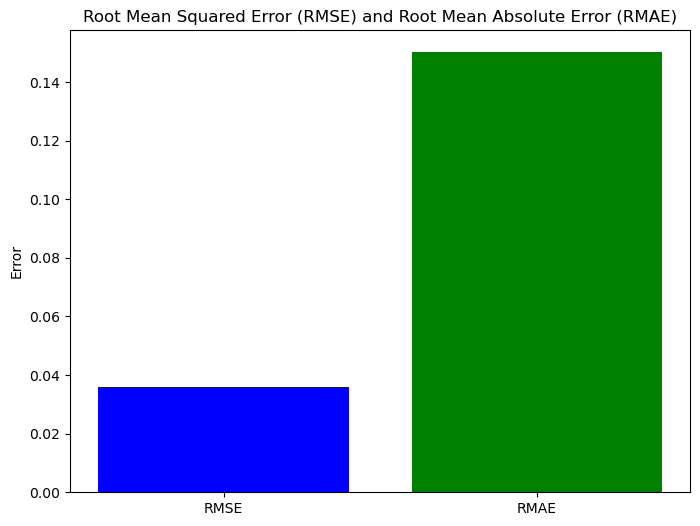

In [86]:
# Plot the RMSE and RMAE
metrics = ['RMSE', 'RMAE']
values = [rmse, rmae]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green'])

# Add labels and title
plt.ylabel('Error')
plt.title('Root Mean Squared Error (RMSE) and Root Mean Absolute Error (RMAE)')

# Show plot
plt.show()

In [87]:
X_train

,Total Value of crop yield,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,Employment in Agriculture,Exchange Rate Value,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent)
0,0.256352,0.001610,0.000000e+00,0.000016,1.715640e-10,0.000126,0.007706,7.044059e-06,0.0,58.0,-2.44,35.7,0.0
1,0.366104,0.001383,1.376917e-05,0.000522,3.721543e-10,0.000126,0.001552,2.137553e-08,0.0,72.0,-0.54,26.2,5.7
2,0.178100,0.012719,2.289737e-06,0.009837,3.271483e-10,0.000126,0.003879,1.119419e-08,0.0,32.0,-1.43,37.6,6.8
3,0.278817,0.002174,0.000000e+00,0.001709,1.089463e-11,0.000126,0.006930,1.493354e-09,0.0,43.0,-2.04,51.8,17.4
4,0.092044,0.000131,6.541172e-07,0.000195,4.063543e-10,0.000126,0.000000,4.015073e-10,0.0,3.0,0.71,22.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,0.508795,0.005176,3.933305e-05,0.004029,6.762634e-10,0.000153,0.000112,5.128737e-09,4.2,13.0,0.97,22.0,18.8
3354,0.632345,0.116974,6.710852e-02,0.128084,7.199354e-10,0.000175,0.019145,2.815071e-09,6.7,25.0,-0.80,15.0,10.2
3355,0.096334,0.003293,2.122376e-03,0.001132,6.631019e-10,0.000158,0.000963,3.628972e-07,53.0,41.0,0.79,14.1,5.2
3356,0.239135,0.002547,4.245715e-04,0.003596,6.500238e-10,0.000138,0.000052,1.318825e-10,10.8,30.0,-0.06,16.7,6.3


In [88]:
X_test

,Total Value of crop yield,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,Employment in Agriculture,Exchange Rate Value,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent)
3358,0.407365,0.009408,0.000008,0.003407,9.549879e-10,0.000244,0.024210,9.457561e-09,17.8,224.0,-0.93,48.1,17.8
3359,0.362203,0.018373,0.000220,0.001582,7.094294e-10,0.000158,0.033866,2.023423e-07,16.3,18.0,-1.08,41.2,12.5
3360,0.132569,0.004896,0.002892,0.002402,7.536521e-10,0.000166,0.000419,1.980091e-09,5.9,22.0,0.63,24.6,15.6
3361,0.054808,0.000041,0.000003,0.000142,0.000000e+00,0.000126,0.000000,1.939763e-10,2.8,0.0,0.52,29.5,0.0
3362,0.389831,0.010943,0.000256,0.000566,7.030683e-10,0.000129,0.012137,1.554521e-08,9.2,22.0,-0.61,35.3,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,0.480924,0.016575,0.000176,0.009609,1.000000e+00,0.012484,0.003583,0.000000e+00,0.0,136.0,-1.53,0.0,0.0
4194,0.580359,0.174705,0.007460,0.045853,7.763031e-10,0.000131,0.043475,3.444832e-06,0.0,17.0,-0.11,0.0,0.0
4195,0.259469,0.026971,0.000276,0.014937,1.005490e-09,0.000159,0.005078,1.540173e-07,0.0,82.0,-2.59,0.0,0.0
4196,0.574500,0.002754,0.001883,0.001130,1.455159e-09,0.000320,0.010272,2.977493e-09,0.0,30.0,0.06,0.0,0.0


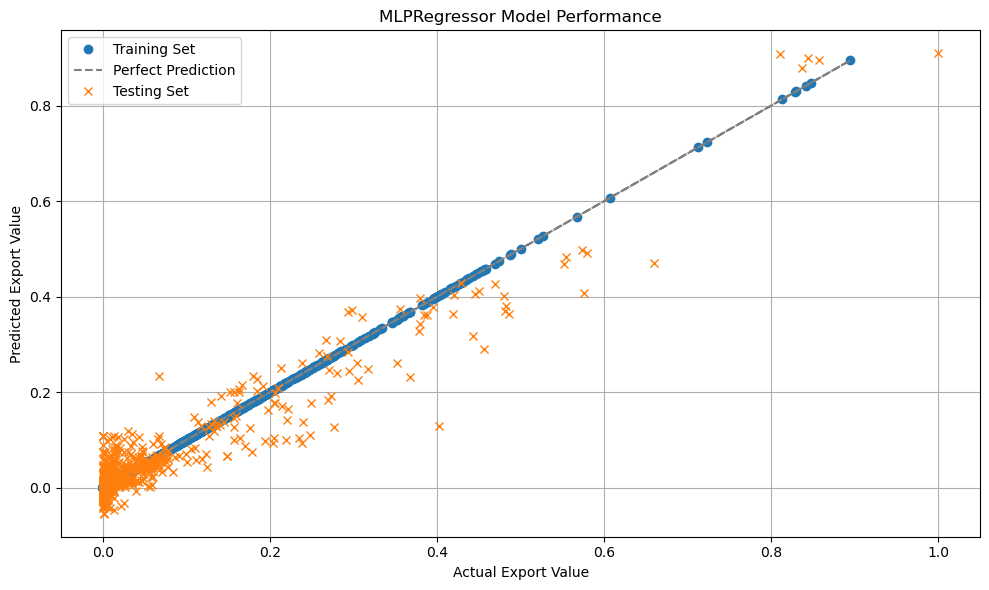

In [89]:

# Plot the results
plt.figure(figsize=(10,6))  # Set figure size

# Plot training data
plt.plot(y_train, y_train, 'o', label='Training Set')
plt.plot(y_train, y_train, '--', color='gray', label='Perfect Prediction')  # Add a line for perfect prediction

# Plot testing data
plt.plot(y_test, y_pred, 'x', label='Testing Set')

# Set labels and title
plt.xlabel("Actual Export Value")
plt.ylabel("Predicted Export Value")
plt.title("MLPRegressor Model Performance")

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
from sklearn.metrics import r2_score

# After training the model with GridSearchCV
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.903584661643886


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10312\3506314901.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')


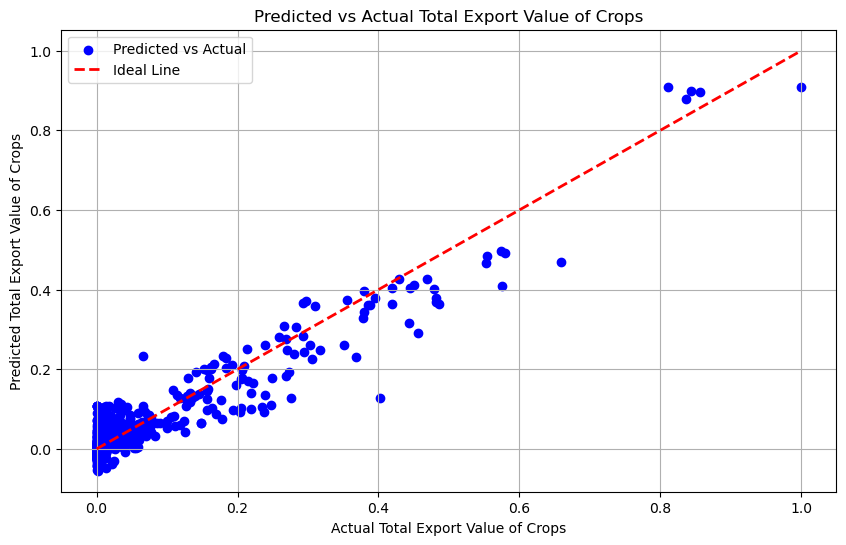

In [91]:
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual Total Export Value of Crops')
plt.ylabel('Predicted Total Export Value of Crops')
plt.title('Predicted vs Actual Total Export Value of Crops')
plt.legend()
plt.grid(True)
plt.show()

**5.MLP Regression Model**

In [92]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define a function to get the input features for the next three years
def get_input_features(country, current_year, merged_df_sorted, num_years=3):
    input_features = []
    for i in range(num_years):
        year = current_year + i + 1
        # Check if data exists for the country in the current year
        country_data = merged_df_sorted[(merged_df_sorted['Area'] == country) & (merged_df_sorted['Year'] == current_year + i)]
        if country_data.empty:
            # If no data, use zeros for features (assuming no data implies no change)
            input_feature = np.zeros(len(merged_df_sorted.columns) - 2)  # Assuming 2 constant features (Year, Country)
        else:
            input_feature = country_data.iloc[:, 2:].values.flatten()
        # Update year for the feature
        input_feature[merged_df_sorted.columns.get_loc('Year') - 2] = year
        input_features.append(input_feature)
    return np.array(input_features)


# Define a function to make predictions for the next three years
def make_predictions(country, current_year, merged_df_sorted, mlp_model):
    export_values = merged_df_sorted.loc[merged_df_sorted['Area'] == country]['TotalExportValue_Crops'].values
    input_features = get_input_features(country, current_year, merged_df_sorted)
    # Remove 'Year' feature before scaling (assuming Year is not relevant)
    input_features = input_features[:, :-1]  # Select all features except the last one (Year)
    input_features = input_features.reshape(input_features.shape[0], -1)  # Reshape input features
    scaler = StandardScaler()
    scaled_input_features = scaler.fit_transform(input_features)  # Scale input features
    predictions = mlp_model.predict(scaled_input_features)
    return predictions


# Define a function to predict future exports for the next three years
def predict_future_exports(country, current_year, merged_df_sorted, mlp_model):
    # Make predictions for the next three years
    predictions = make_predictions(country, current_year, merged_df_sorted, mlp_model)

    # Print the predicted export value for the third year
    year = current_year + 3  # Predictions for the third year
    print(f"Predicted export value for {country} in {year}: {predictions[2]}")


# Example usage
country = input("Enter the name of the country: ")  # Input the country name
current_year = 2022  # Assuming historical data is available up until the year 2022
predict_future_exports(country, current_year, merged_df_sorted, best_model)


Enter the name of the country: Denmark
Predicted export value for Denmark in 2025: 0.007954343393326749


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [93]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


# Define your MLP regressor model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                             alpha=0.0001, batch_size='auto', learning_rate='constant', 
                             learning_rate_init=0.001, max_iter=200, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(mlp_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive (since scikit-learn returns negated values)
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-validation scores:")
print(cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(cv_scores)
std_dev_score = np.std(cv_scores)

print("\nMean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_dev_score)


Cross-validation scores:
[0.00670112 0.00636064 0.00645874 0.00815763 0.00772631]

Mean cross-validation score: 0.007080888871175047
Standard deviation of cross-validation scores: 0.0007247065276097358


In [94]:


# Extract data instance IDs from the test set 
data_instance_ids = X_test.index.tolist()

# Extract true labels from the test set
true_labels = y_test.tolist()

# Make predictions using your trained model
predictions = best_model.predict(X_test)

# Create a DataFrame to store the data
output_df = pd.DataFrame({
    'Data Instance ID': data_instance_ids,
    'True Label': true_labels,
    'Predicted Label': predictions
})

# Write the DataFrame to a CSV file
output_df.to_csv('model_outputs.csv', index=False)

print("CSV file 'model_outputs.csv' has been created successfully.")


CSV file 'model_outputs.csv' has been created successfully.


In [95]:
# Display any selected 5 rows and specific columns randomly to check the performance of the model
selected_rows = output_df.iloc[[2, 22, 26, 36, 68], :]  # All columns, specific rows
selected_rows

,Data Instance ID,True Label,Predicted Label
2,3360,0.002670,0.002790
22,3380,0.045206,0.040570
26,3384,0.050114,0.051285
36,3394,0.022426,0.021021
68,3426,0.019883,0.014354
